In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np

In [2]:
control = Table.read('./data2/control_stat_LoTSS_63_sorted.fits')
jelly = Table.read('./stat2/stat_sfr_6_23_all_data.fits')
# control_hb = Table.read('./stat/control_stat_5_7_hb.fits')


# con_con = Table.read('./data/con.dat',format='ascii')
# con1 = Table.read('./data/con1.dat',format='ascii')

# area_mask = np.logical_and(control['pix_used_ratio']>0.8, control['lead_area']>24, control['trail_area']>24)

# control=control[area_mask]

# ba_mask = control['NSA_SERSIC_BA']>=0.4
# control=control[ba_mask]
# control_hb = control_hb[mask]

(array([0.        , 0.10582011, 0.21164021, 0.63492063, 2.53968254,
        2.53968254, 0.42328042, 0.21164021, 0.        , 0.        ]),
 array([-0.75, -0.6 , -0.45, -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,
         0.6 ,  0.7 ]),
 <BarContainer object of 10 artists>)

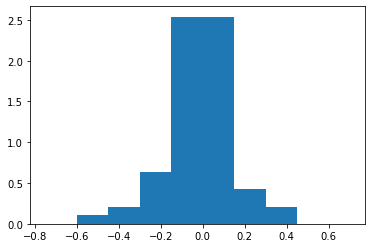

In [3]:
bins = [-0.75, -0.6, -0.45, -0.3, -.15, 0, 0.15, 0.3, 0.45, 0.6, 0.7]
plt.hist((control['lead_mass_mean'] - control['trail_mass_mean']) /
         (control['lead_mass_mean'] + control['trail_mass_mean']),
         bins=bins,
         density=True)

<ipython-input-6-a348f9532f9c>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


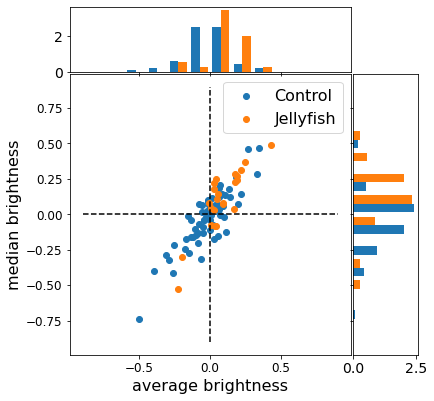

In [6]:
plt.rcParams['font.size'] = 16
# definitions for the axes
left, width = 0.15, 0.65
bottom, height = 0.15, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = (jelly['lead_mean'] - jelly['trail_mean']) / (jelly['lead_mean'] + jelly['trail_mean'])
y = (jelly['lead_median'] - jelly['trail_median']) / (jelly['lead_median'] +
                                               jelly['trail_median'])
i = (control['lead_mean'] - control['trail_mean']) / (control['lead_mean'] +
                                             control['trail_mean'])
j = (control['lead_median'] - control['trail_median']) / (control['lead_median'] +
                                                   control['trail_median'])

ax.scatter(i, j, label='Control')
ax.scatter(x, y, label='Jellyfish')
ax.legend()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(axis="y", labelsize=14)
ax_histy.tick_params(axis="x", labelsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel('average brightness')
ax.set_ylabel('median brightness')

ax_histx.hist([i, x], bins=bins, density=True)
ax_histy.hist([j, y], bins=bins, orientation='horizontal', density=True)
ax.vlines(0, -0.9, 0.9, colors="black", linestyles="dashed")
ax.hlines(0, -0.9, 0.9, colors="black", linestyles="dashed")

plt.tight_layout()
fig.savefig('scatter_lofar.pdf')

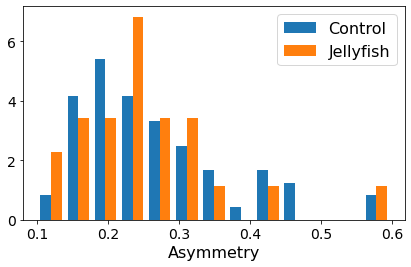

In [9]:
plt.hist([control['asymmetry'], jelly['asymmetry']],
         #cumulative=True,
         #histtype='step',
         bins=13,
         density=True,
         label=['Control', 'Jellyfish'])
ax = plt.gca()
ax.set_xlabel('Asymmetry')
ax.legend()
ax.tick_params(labelsize=14)
fig = plt.gcf()
plt.tight_layout()
fig.savefig('asy_hist_lofar.pdf')


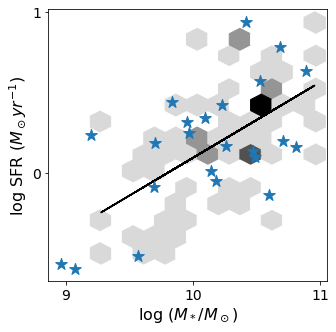

0.4692277839303097*M + -4.595734911650835


In [19]:
x = control['log_M']
y = np.log10(control['sfr'])

i = jelly['log_M']
j = np.log10(jelly['sfr'])

fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)

ax = plt.gca()
# plt.scatter(x,y)
hexb = ax.hexbin(x, y, gridsize=(10,7), cmap=plt.cm.Greys, edgecolors='face')
# fig.colorbar(hexb, ax=ax)
m,c = np.polyfit(x,y,1)
ax.plot(x, m*x + c, c='black')

ax.scatter(i,j,marker='*',s=150,zorder=100)

from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.rcParams['font.size'] = 16
ax.tick_params(labelsize=14)
ax.set_xlabel('log $(M_*/M_\odot)$')
ax.set_ylabel('log SFR $(M_\odot yr^{-1})$')

plt.show()

print(str(m)+'*M + '+str(c))

fig.savefig('sfr_lofar.pdf')


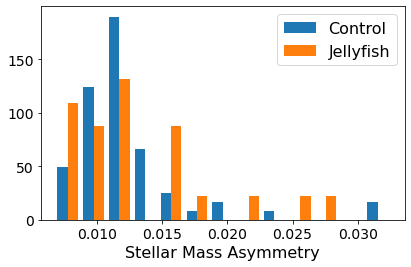

In [8]:
control = Table.read('./stat2/control_stat_sfr_mass_10_5.fits')
jelly = Table.read('./stat2/stat_sfr_mass_10_5.fits')
plt.hist([control['asymmetry_mass'], jelly['asymmetry_mass']],
         #cumulative=True,
         #histtype='step',
         bins=13,
         density=True,
         label=['Control', 'Jellyfish'])
ax = plt.gca()
ax.tick_params(labelsize=12)

ax.set_xlabel('Stellar Mass Asymmetry')
ax.legend()
ax.tick_params(labelsize=14)
fig = plt.gcf()
plt.tight_layout()
fig.savefig('asy_hist_lofar.pdf')

<ipython-input-3-deba6bf64c40>:19: RuntimeWarning: invalid value encountered in true_divide
  i = (control['lead_mass_mean'] - control['trail_mass_mean']) / (control['lead_mass_mean'] +
<ipython-input-3-deba6bf64c40>:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


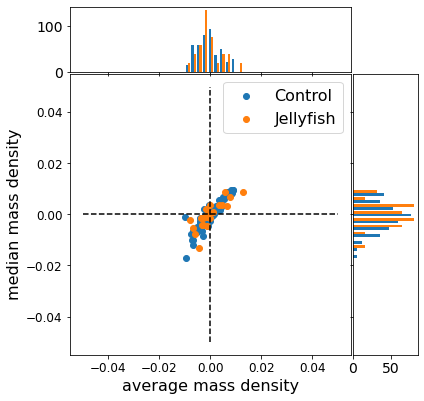

In [3]:
plt.rcParams['font.size'] = 16
# definitions for the axes
left, width = 0.15, 0.65
bottom, height = 0.15, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = (jelly['lead_mass_mean'] - jelly['trail_mass_mean']) / (jelly['lead_mass_mean'] + jelly['trail_mass_mean'])
y = (jelly['lead_mass_median'] - jelly['trail_mass_median']) / (jelly['lead_mass_median'] +
                                               jelly['trail_mass_median'])
i = (control['lead_mass_mean'] - control['trail_mass_mean']) / (control['lead_mass_mean'] +
                                             control['trail_mass_mean'])
j = (control['lead_mass_median'] - control['trail_mass_median']) / (control['lead_mass_median'] +
                                                   control['trail_mass_median'])

ax.scatter(i, j, label='Control')
ax.scatter(x, y, label='Jellyfish')
ax.legend()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(axis="y", labelsize=14)
ax_histy.tick_params(axis="x", labelsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel('average mass density')
ax.set_ylabel('median mass density')
bins = [-0.75, -0.6, -0.45, -0.3, -.15, 0, 0.15, 0.3, 0.45, 0.6, 0.7]
ax_histx.hist([i, x], 
            #   bins=bins, 
              density=True)
ax_histy.hist([j, y], 
            #   bins=bins, 
              orientation='horizontal', density=True)
ax.vlines(0, -0.05, 0.05, colors="black", linestyles="dashed")
ax.hlines(0, -0.05, 0.05, colors="black", linestyles="dashed")

plt.tight_layout()
fig.savefig('scatter_lofar.pdf')

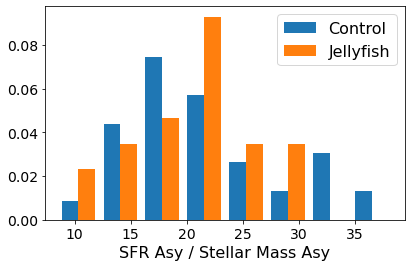

In [16]:
control = Table.read('./stat2/control_stat_sfr_mass_10_5.fits')
jelly = Table.read('./stat2/stat_sfr_mass_10_5.fits')
plt.hist([control['asymmetry']/control['asymmetry_mass'], jelly['asymmetry']/jelly['asymmetry_mass']],
         #cumulative=True,
         #histtype='step',
         bins=8,
         density=True,
         label=['Control', 'Jellyfish'])
ax = plt.gca()
ax.set_xlabel('SFR Asy / Stellar Mass Asy')
ax.legend()
ax.tick_params(labelsize=14)
fig = plt.gcf()
plt.tight_layout()
fig.savefig('asy_hist_lofar.pdf')

<ipython-input-5-dd22e3441bac>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


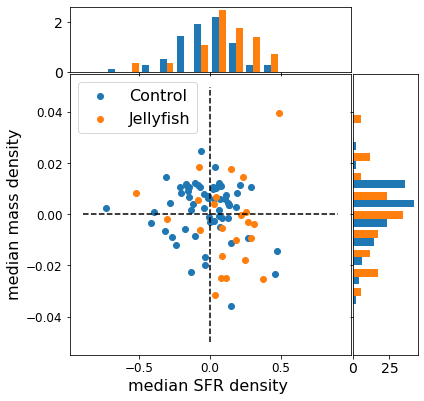

In [5]:
plt.rcParams['font.size'] = 16
# definitions for the axes
left, width = 0.15, 0.65
bottom, height = 0.15, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = (jelly['lead_median'] - jelly['trail_median']) / (jelly['lead_median'] +
                                               jelly['trail_median'])
y = (jelly['lead_mass_median'] - jelly['trail_mass_median']) / (jelly['lead_mass_median'] +
                                               jelly['trail_mass_median'])
i = (control['lead_median'] - control['trail_median']) / (control['lead_median'] +
                                                   control['trail_median'])
j = (control['lead_mass_median'] - control['trail_mass_median']) / (control['lead_mass_median'] +
                                                   control['trail_mass_median'])

ax.scatter(i, j, label='Control')
ax.scatter(x, y, label='Jellyfish')
ax.legend()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(axis="y", labelsize=14)
ax_histy.tick_params(axis="x", labelsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel('median SFR density ')
ax.set_ylabel('median mass density')
bins = [-0.75, -0.6, -0.45, -0.3, -.15, 0, 0.15, 0.3, 0.45, 0.6, 0.7]
ax_histx.hist([i, x], 
            #   bins=bins, 
              density=True)
ax_histy.hist([j, y], 
            #   bins=bins, 
              orientation='horizontal', density=True)
ax.vlines(0, -0.05, 0.05, colors="black", linestyles="dashed")
ax.hlines(0, -0.9, 0.9, colors="black", linestyles="dashed")

plt.tight_layout()
fig.savefig('scatter_lofar.pdf')

<ipython-input-6-59bdf9fbdc3a>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


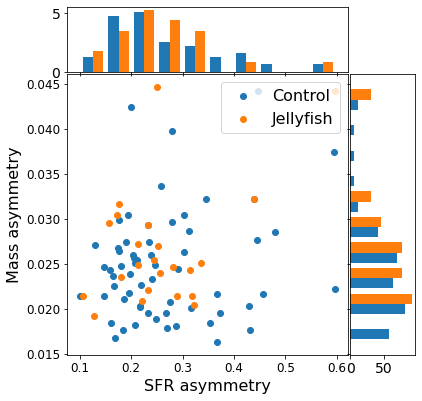

In [6]:
plt.rcParams['font.size'] = 16
# definitions for the axes
left, width = 0.15, 0.65
bottom, height = 0.15, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = jelly['asymmetry']
y = jelly['asymmetry_mass']
i = control['asymmetry']
j = control['asymmetry_mass']
ax.scatter(i, j, label='Control')
ax.scatter(x, y, label='Jellyfish')
ax.legend()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(axis="y", labelsize=14)
ax_histy.tick_params(axis="x", labelsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel('SFR asymmetry')
ax.set_ylabel('Mass asymmetry')
bins = [-0.75, -0.6, -0.45, -0.3, -.15, 0, 0.15, 0.3, 0.45, 0.6, 0.7]
ax_histx.hist([i, x], 
            #   bins=bins, 
              density=True)
ax_histy.hist([j, y], 
            #   bins=bins, 
              orientation='horizontal', density=True)
# ax.vlines(0, -0.05, 0.05, colors="black", linestyles="dashed")
# ax.hlines(0, -0.05, 0.05, colors="black", linestyles="dashed")

plt.tight_layout()
fig.savefig('scatter_lofar.pdf')

In [18]:
a = control['asymmetry']/control['asymmetry_mass']
a[29]

nan

In [16]:
control['asymmetry_mass'][29]

nan